<a href="https://colab.research.google.com/github/karsarobert/MachineLearning2025/blob/main/PTE_ML11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A mesterséges intelligencia matematikai alapjai gyakorlat
# PTE Gépi tanulás

## 11. Gyakorlat: Nem felügyelt tanítási módszerek
### 2025. november 24.

#Felügyelet nélküli tanítás
A felügyelet nélküli tanulás a gépi tanulás egyik legfontosabb ága. Lehetővé teszi számunkra, hogy előrejelzéseket készítsünk, amikor nem rendelkezünk célcímkékkel. A felügyelet nélküli tanulás során a modell csak szolgáltatásokon keresztül tanul, mivel az adatkészletnek nincs célcímke oszlopa. A legtöbb gépi tanulási probléma valamivel kezdődik, ami segít automatizálni a folyamatot. Például, ha előrejelzési modellt szeretne kidolgozni a cukorbetegek kimutatására, akkor az adatkészletben szereplő minden egyes beteg számára célcímkékre van szüksége. A kezdeti szakaszban a célcímkék elrendezése bármilyen gépi tanulási probléma esetén nem egyszerű feladat, mert meg kell változtatni az üzleti folyamatot a címkék megszerzéséhez, akár manuális házon belüli címkézéssel, akár az adatok újra címkékkel történő gyűjtésével.

A felügyelet nélküli tanulás megfigyeléssel, nem példamutatással való tanulást jelent. Ez a fajta tanulás címkézetlen adatokkal működik. A dimenziócsökkentés és a klaszterezés az ilyen tanulás példái. A dimenziócsökkentést arra használjuk, hogy nagyszámú attribútumot csak néhányra redukáljunk, amelyek ugyanazt az eredményt tudják elérni. Számos módszer áll rendelkezésre az adatok dimenziósságának csökkentésére, mint például a főkomponens-elemzés ( PCA ), a t-SNE, a wavelet-transzformáció és az attribútum-alkészlet kiválasztása.

A klaszter kifejezés hasonló elemek csoportját jelenti, amelyek szorosan kapcsolódnak egymáshoz. A klaszterezés egy olyan megközelítés, amellyel egymáshoz hasonló egységeket vagy elemcsoportokat hozhatunk létre. Ezt a hasonlóságot az elemek bizonyos jellemzői vagy jellemzői alapján számítják ki.  A klaszterezésnek számos alkalmazása van, például dokumentumok keresésében, üzleti intelligencia, információbiztonság és ajánlórendszerekben



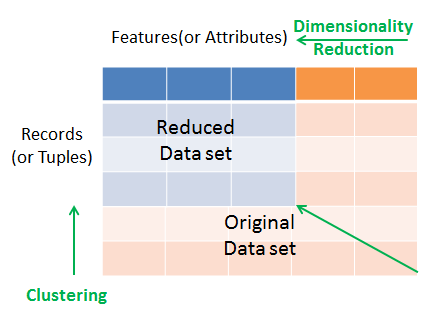

# k-Means klaszterezés

Most áttérünk a felügyelet nélküli gépi tanulási modellekre a klaszterező algoritmusokra. A klaszterező algoritmusok az adatok tulajdonságaiból próbálják megtanulni a pontcsoportok optimális felosztását vagy diszkrét címkézését.

Számos klaszterező algoritmus elérhető a Scikit-Learnben és máshol, de talán a legegyszerűbben érthető a k-means klaszterezés néven ismert algoritmus, amelyet a sklearn.cluster.KMeans implementál.

# A k-Means bemutatása
Az *k*-means algoritmus előre meghatározott számú klasztert keres egy címkézetlen többdimenziós adathalmazon belül.
Ezt egy egyszerű elképzelés alapján végzi el, amely szerint az optimális klaszterezés hogyan néz ki:

- A "klaszterközpont" a klaszterhez tartozó összes pont számtani átlaga.
- Minden pont közelebb van a saját klaszterközpontjához, mint más klaszterközpontokhoz.

Ez a két feltételezés az alapja a *k*-means modellnek.
Hamarosan elmerülünk abban, hogy pontosan *hogyan* jut el az algoritmus ehhez a megoldáshoz, de most nézzünk meg egy egyszerű adathalmazt, és nézzük meg az *k*-means eredményét.

Először is generáljunk egy kétdimenziós adathalmazt, amely négy különböző pacát tartalmaz.
Hogy hangsúlyozzuk, hogy ez egy felügyelet nélküli algoritmus, a címkéket hagyjuk ki a megjelenítésből

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

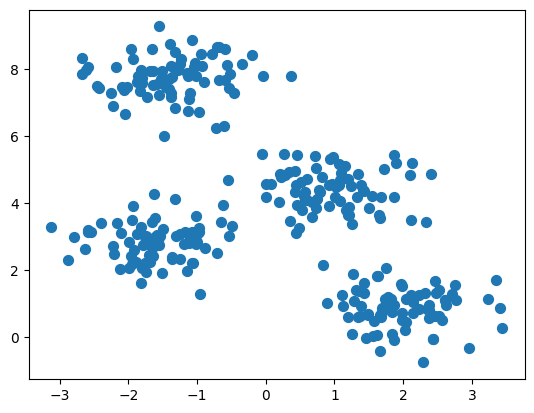

In [ ]:
import matplotlib.pyplot as plt
#import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

Ránézésre viszonylag könnyen kiválasztható a négy klaszter. A k-means algoritmus ezt automatikusan elvégzi, és a Scikit-Learnben a tipikus becslő API-t használja:

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, n_init='auto')
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Vizualizáljuk az eredményeket a címkékkel színezett adatok ábrázolásával. A k-means becslő által meghatározott klaszterközpontokat is ábrázoljuk:

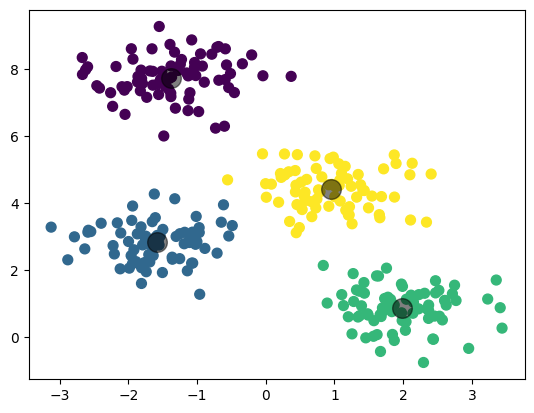

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

A jó hír az, hogy a k-means algoritmus (legalábbis ebben az egyszerű esetben) nagyon hasonlóan rendeli a pontokat a klaszterekhez, mint ahogyan mi szemmel láthatnánk őket. De csodálkozhatunk, hogy ez az algoritmus hogyan találja meg ezeket a klasztereket ilyen gyorsan! Végül is a klaszterbeosztások lehetséges kombinációinak száma exponenciális az adatpontok számával - a kimerítő keresés nagyon-nagyon költséges lenne. Szerencsénkre ilyen kimerítő keresésre nincs szükség: ehelyett a k-means tipikus megközelítése egy intuitív iteratív megközelítést, az úgynevezett elvárás-maximalizálást (expectation–maximization) alkalmazza.



Az elvárt-maximalizálás (E-M) egy hatékony algoritmus, amely az adattudományon belül számos kontextusban jelenik meg.
Az *k*-means az algoritmus egy különösen egyszerű és könnyen érthető alkalmazása, és itt röviden végigmegyünk rajta.
Röviden, a elvárás-maximalizáló megközelítés itt a következő eljárásból áll:

1. Találjunk ki néhány klaszterközpontot
2. Ismétlés konverzióig
   1. *E-lépés*: pontok hozzárendelése a legközelebbi klaszterközponthoz.
   2. *M-lépés*: a klaszterközéppontok beállítása a középértékre.

Itt az "E-lépés" vagy "várakozási lépés" azért kapta ezt a nevet, mert a várakozásunk frissítését foglalja magában arra vonatkozóan, hogy az egyes pontok melyik klaszterhez tartoznak.
Az "M-lépés" vagy "maximalizálási lépés" azért kapta ezt a nevet, mert a klaszterközpontok helyét meghatározó alkalmassági függvény maximalizálását jelenti - ebben az esetben a maximalizálás az egyes klaszterek adatainak egyszerű átlagának meghatározásával történik.

Az algoritmussal kapcsolatos szakirodalom hatalmas, de a következőképpen foglalható össze: tipikus körülmények között az E-lépés és az M-lépés minden egyes ismétlése mindig a klaszterjellemzők jobb becslését eredményezi.

Az algoritmust a következő ábrán látható módon szemléltethetjük.
Az itt látható konkrét inicializálás esetén a klaszterek mindössze három iteráció alatt konvergálnak.
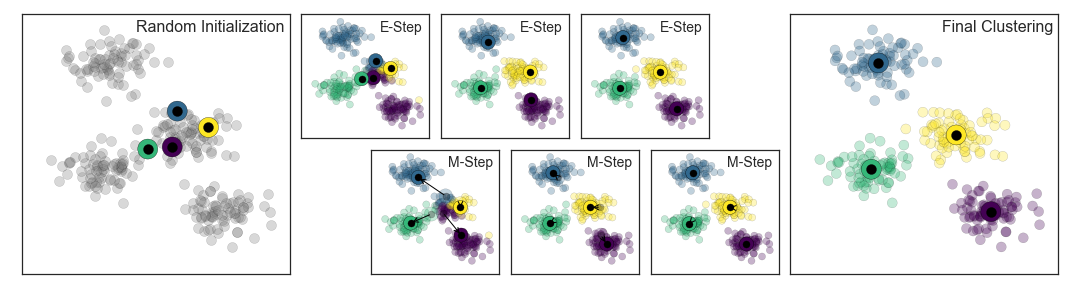

### Az elvárás-maximalizálással kapcsolatos megfontolások

Az elvárás-maximalizáló algoritmus használatakor néhány dologra érdemes odafigyelni.

#### A globálisan optimális eredményt nem biztos, hogy el lehet érni.
Először is, bár az E-M eljárás minden egyes lépésben garantáltan javítja az eredményt, nem biztos, hogy a *globálisan* legjobb megoldáshoz vezet.
Ha például egyszerű eljárásunkban más véletlen magot használunk, akkor az adott kiindulási tippek rossz eredményre vezetnek.

#### A klaszterek számát előzetesen ki kell választani.
A *k*-means másik gyakori kihívása, hogy meg kell mondanunk neki, hány klaszterre számítunk: a klaszterek számát nem tudja megtanulni az adatokból.
Ha például azt kérjük az algoritmustól, hogy hat klasztert azonosítson, akkor boldogan folytatja, és megtalálja a legjobb hat klasztert:

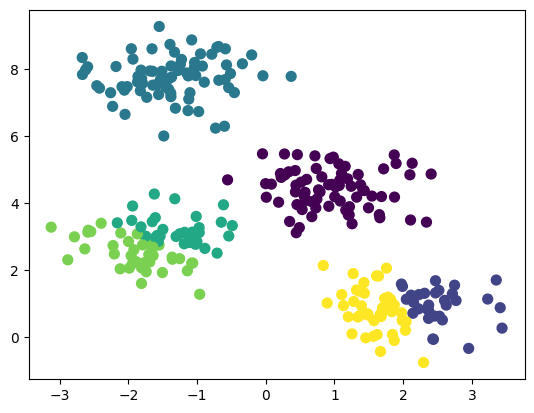

In [ ]:
labels = KMeans(6, random_state=0, n_init='auto').fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

Hogy az eredménynek van-e értelme, arra nehéz végleges választ adni; az egyik megközelítés, amely meglehetősen intuitív, amelyet késöbb tárgyalunk, az úgynevezett [sziluettelemzés] (http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).

Alternatívaként használhat egy bonyolultabb klaszterező algoritmust, amely a klaszterek számának megfelelőbb mennyiségi mérőszámmal rendelkezik a klaszterek számának fittségére (pl. Gauss keverékmodellek; vagy amely *választhat* megfelelő számú klasztert (pl. DBSCAN, mean-shift, vagy affinitás propagáció, mind elérhető az ``sklearn.cluster`` almodulban).

#### A k-means lassú lehet nagyszámú minta esetén.
Mivel a *k*-means minden egyes iterációjának az adathalmaz minden pontjához hozzá kell férnie, az algoritmus viszonylag lassú lehet a minták számának növekedésével.
Elgondolkodhat azon, hogy ez a követelmény, miszerint minden egyes iterációban az összes adatot fel kell használni, enyhíthető-e; például használhatja az adatok egy részhalmazát a klaszterközpontok frissítéséhez minden egyes lépésnél.
Ez az ötlet áll a kötegelt *k*-means algoritmusok mögött, amelyek egyik formáját az ``sklearn.cluster.MiniBatchKMeans`` tartalmazza.
Ennek interfésze ugyanaz, mint a standard ``KMeans``-nek; a következőkben látni fogunk egy példát a használatára.

#A klaszterek számának meghatározása
Ebben a részben a klaszterezési algoritmusok legalapvetőbb problémájára fogunk összpontosítani, amely az adathalmazban lévő klaszterek számának feltárása – erre nincs határozott válasz. Azonban nem minden fürtözési algoritmus igényel előre meghatározott számú fürtöt. A hierarchikus és DBSCAN klaszterezésben nem kell definiálni a klaszterek számát, de a k-means, a k-medoidoknál és a spektrális klaszterezésnél meg kell határoznunk a klaszterek számát. A klaszterek számának megfelelő érték kiválasztása bonyolult, ezért nézzünk meg néhány módszert a klaszterek legjobb számának meghatározására:

- A könyök (elbow) módszer
- A sziluett módszer

##A könyök módszer
A könyök módszer jól ismert módszer a klaszterek legjobb számának meghatározására. Ennél a módszernél a különböző számú klaszterek variancia százalékára összpontosítunk. Ennek a módszernek a lényege, hogy kiválassza a klaszterek számát, amelyhez egy másik klaszter hozzáfűzése nem okozhat jelentős változást a szórásban. Egy klaszteren belüli négyzetösszeg grafikonját ábrázolhatjuk a klaszterek számának felhasználásával, hogy megtaláljuk az optimális értéket. A négyzetek összegét a klaszteren belüli négyzetösszegnek ( WCSS ) vagy tehetetlenségnek is nevezik:

![](https://149695847.v2.pressablecdn.com/wp-content/uploads/2019/08/4_wcss.png)

A WCSS az egyes pontok és a klaszter súlypontja közötti távolság négyzetének összege. Ha a WCSS-t a K értékkel ábrázoljuk, a diagram úgy néz ki, mint egy könyök. A klaszterek számának növekedésével a WCSS értéke csökkenni kezd. A WCSS érték akkor a legnagyobb, ha K = 1. A grafikon elemzésekor láthatjuk, hogy a grafikon egy ponton gyorsan változik, és így könyök alakot hoz létre. Ettől kezdve a grafikon az X tengellyel majdnem párhuzamosan mozog. Az ehhez a ponthoz tartozó K érték az optimális K érték vagy a klaszterek optimális száma.

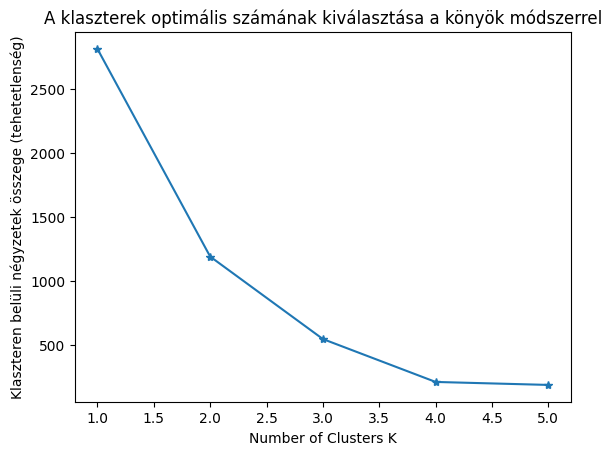

In [ ]:
wcss_list = []

# Ciklus különböző k értékekkel
for i in range(1, 6):
    # kmeans modell létrehozása, illesztése
    kmeans = KMeans(n_clusters = i, random_state = 123, n_init='auto') # A k-means algoritmus futtatásának száma különböző centroidokkal
    kmeans.fit(X)
    # WCSS érték hozzáadása a listához
    wcss_list.append(kmeans.inertia_)

# WCSS grafikon kirajzolása
plt.plot(range(1, 6), wcss_list, marker='*')
plt.title('A klaszterek optimális számának kiválasztása a könyök módszerrel')
plt.xlabel('Number of Clusters K')
plt.ylabel('Klaszteren belüli négyzetek összege (tehetetlenség)')
plt.show()

Mint látható, k = 4-nél a grafikon jelentősen ellaposodni kezd, ezért 4-et választanánk a klaszterek számának.

#A sziluett módszer
A sziluett módszer értékeli és validálja a klaszteradatokat. Meghatározza, hogy az egyes adatpontok milyen jól vannak besorolva. A sziluett pontszámának grafikonja segít megjeleníteni és értelmezni, hogy az adatpontok mennyire vannak szorosan csoportosítva saját klasztereiken belül, és mennyire különülnek el másoktól. Segít a klaszterek számának értékelésében. Pontszáma -1 és +1 között mozog. A pozitív érték jól elkülönített klasztert, a negatív érték pedig a helytelenül hozzárendelt adatpontokat jelzi. Minél pozitívabb az érték, annál távolabbi adatpontok vannak a legközelebbi klaszterekből; a nulla érték azokat az adatpontokat jelöli, amelyek a két klaszter közötti elválasztó vonalon vannak. Lássuk a sziluett pontszámának képletét:

$$
S(i) = \frac{bi-ai}{max(bi,ai)}
$$

ai az i - edik adatpont átlagos távolsága a klaszteren belüli többi ponttól.

bi az i - edik adatpont átlagos távolsága a többi klaszterponttól.

Ez azt jelenti, hogy könnyen kijelenthetjük, hogy S(i) [-1, 1] között van. Tehát ahhoz, hogy S(i) 1 közelében legyen, ai - nek nagyon kicsinek kell lennie bi -hez képest, azaz e. ai << b
i .

Keressük meg a klaszterek optimális számát a Python sziluett pontszámával:

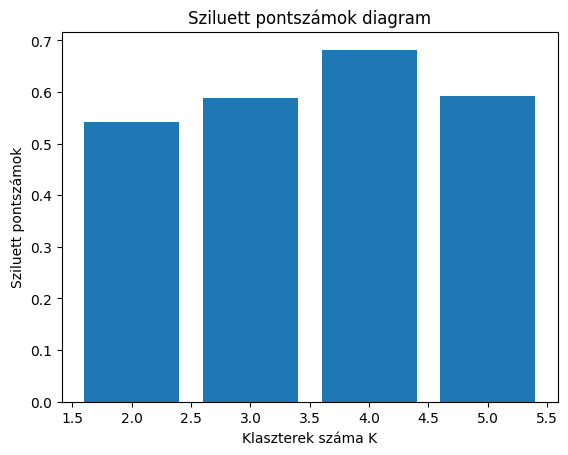

In [ ]:
from sklearn.metrics import silhouette_score
score_list = []

# Ciklus különböző k értékekkel
for i in range(2, 6):
    # kmeans modell létrehozása, illesztése
    kmeans = KMeans(n_clusters = i, random_state = 123, n_init='auto')
    kmeans.fit(X)

    # predikció kiszámítása
    pred=kmeans.predict(X)
    # sziluett pontszám kiszámítása
    score = silhouette_score(X, pred, metric='euclidean')

    # sziluett pontszám listához adása
    score_list.append(score)

# Sziluett grafikon kirajzolása
plt.bar(range(2, 6), score_list)
plt.title('Sziluett pontszámok diagram')
plt.xlabel('Klaszterek száma K')
plt.ylabel('Sziluett pontszámok')
plt.show()

Mint látható, k = 4-nél a sziluett pontszáma a legmagasabb, ezért 4 klasztert választanánk.

#DBSCAN klaszterezés
A particionáló klaszterezési módszerek, mint például a k-közép, és a hierarchikus klaszterezési módszerek, mint például az agglomeratív klaszterezés, alkalmasak gömb- vagy konvex klaszterek felfedezésére. Ezek az algoritmusok érzékenyebbek a zajra vagy a kiugró értékekre, és jól elkülönített klasztereknél működnek:

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/db6-e1584577503359.png)



Intuitív módon azt mondhatjuk, hogy a sűrűség alapú klaszterezési megközelítés leginkább arra hasonlít, ahogyan mi, emberek ösztönösen csoportosíthatjuk az elemeket. Az összes előző ábrán gyorsan láthatjuk a különböző csoportok vagy klaszterek számát az elemek sűrűségéből adódóan.

Az alkalmazások sűrűség alapú térbeli klaszterezése zajjal ( DBSCAN ) a csoportok és a zaj elgondolásán alapul. A mögöttes alapötlet az, hogy egy csoport vagy fürt minden adatelemének minimális számú adateleme van egy adott sugárban.

A DBSCAN fő célja a sűrű régió felfedezése, amely minimális számú objektum ( minPoints) és adott sugár ( eps) használatával kiszámítható. A DBSCAN képes véletlenszerű fürtformákat generálni, és kezelni az adatkészletben lévő zajokat. Ezenkívül nem követelmény a fürtök számának betáplálása. A DBSCAN automatikusan azonosítja az adatokban lévő fürtök számát.

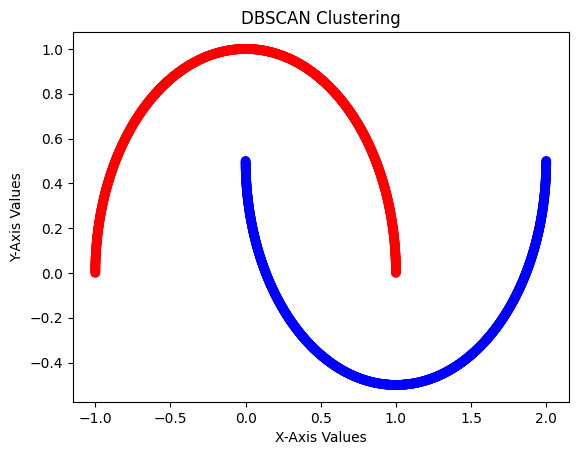

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

# Véletlenszerű adatok generálása
features, label = make_moons(n_samples = 2000)

# DBSCAN klaszterező definiálása
db = DBSCAN()
db.fit(features) # modell illesztése
pred_label=db.labels_ # klaszterhez tartozó cimkék meghatározása

plt.scatter(features[:, 0], features[:, 1], c=pred_label, # klaszterek kirajzolása
marker="o",cmap="bwr_r")
plt.title('DBSCAN Clustering')
plt.xlabel('X-Axis Values')
plt.ylabel('Y-Axis Values')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, n_init='auto')
kmeans.fit(features)
y_kmeans = kmeans.predict(features)

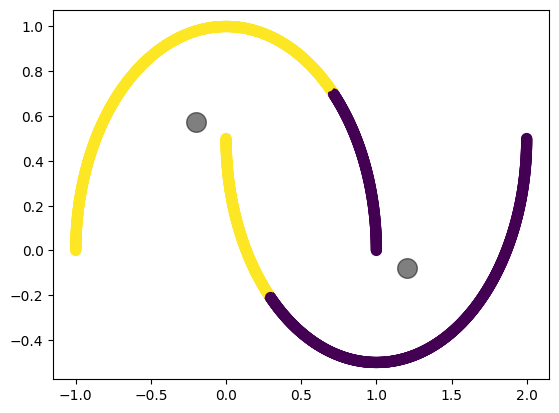

In [ ]:
plt.scatter(features[:, 0], features[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Először is importáljuk az DBSCANosztályt, és létrehozzuk a holdadatkészletet. Ezt követően elkészítjük a DBSCAN modellt és illesztjük az adatkészletre. A DBSCAN-nak nincs szüksége a fürtök számára. A betanítás után a modell készen áll arra, hogy a predict()módszer segítségével előrejelzéseket készítsen. Az eredmények előrejelzése után a klasztereredményeket szórásdiagram segítségével ábrázoltuk. Ebben a részben láthattuk, hogyan működik a DBSCAN-fürtözés, és hogyan valósítható meg a scikit-learn könyvtár használatával. A következő részben a spektrális klaszterezési technikát fogjuk látni.

#Példa
A klaszterezés egyik érdekes alkalmazása a képeken belüli színtömörítés. Képzeljük el például, hogy van egy millió színből álló képünk. A legtöbb képen a színek nagy része kihasználatlan, és a kép sok pixele hasonló vagy akár azonos színű.

Vegyük például a következő ábrán látható képet, amely a Scikit-Learn datasets moduljából származik (a működéshez telepítve kell lennie a Python Pillow csomagnak).

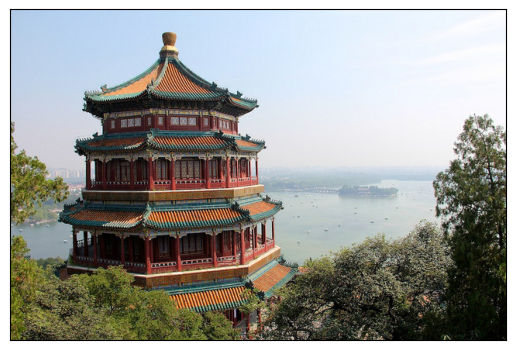

In [ ]:
from sklearn.datasets import load_sample_image

china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

Maga a kép egy háromdimenziós tömbben van tárolva (magasság, szélesség, RGB), amely a vörös/kék/zöld hozzájárulásokat 0 és 255 közötti egész számokként tartalmazza:

In [ ]:
china.shape

(427, 640, 3)

Ezt a pixelhalmazt egy háromdimenziós színtérben lévő pontfelhőként is szemlélhetjük. Átalakítjuk az adatokat [n_samples x n_features] alakúra, és a színeket úgy méretezzük át, hogy 0 és 1 között legyenek:

In [ ]:
data = china / 255.0 # adatokat 0...1 közé skálázzuk
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

Ezeket a pixeleket ebben a színtérben tudjuk megjeleníteni, a hatékonyság érdekében egy 10 000 pixelből álló részhalmazt használva:

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N] #kiválasztunk 10000 adatpontot
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

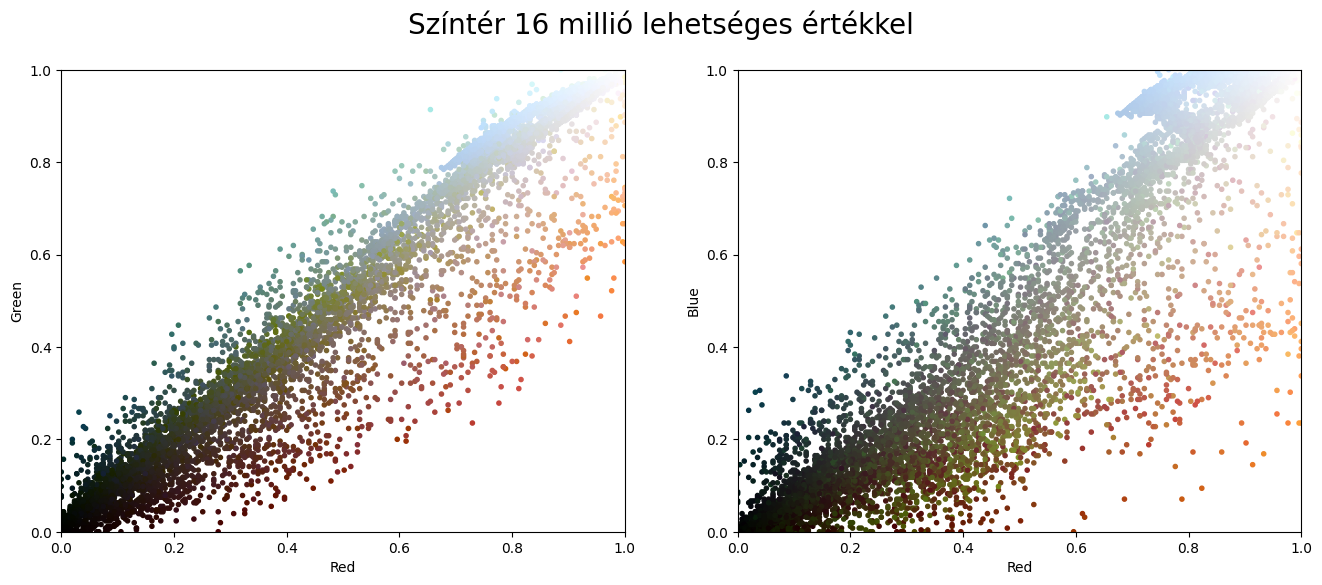

In [ ]:
plot_pixels(data, title='Színtér 16 millió lehetséges értékkel')

Most pedig redukáljuk ezt a 16 millió színt mindössze 16 színre, a pixeltérben k-means klaszterezéssel. Mivel nagyon nagy adathalmazzal van dolgunk, a mini batch k-means-t fogjuk használni, amely az adatok részhalmazain dolgozik, így sokkal gyorsabban kiszámítja az eredményt, mint a hagyományos k-means algoritmus:

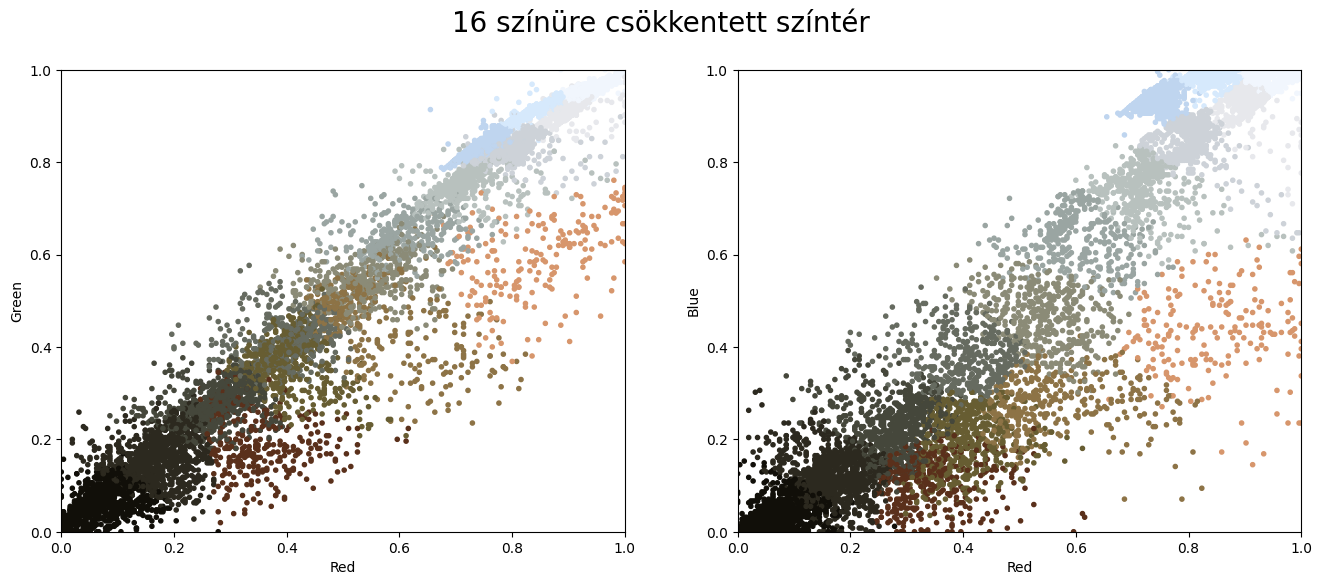

In [ ]:
#import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16, n_init='auto') #próbáljuk ki 256 színnel is
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)] # a teljes képre elvégezzük a tömörítést
# kiazámítjuk melyik klaszterba tartozik, majd annak a színét rendeljük az adott ponthoz

plot_pixels(data, colors=new_colors,
            title="16 színüre csökkentett színtér")

Az eredmény az eredeti képpontok újraszínezése, ahol minden egyes képpont a hozzá legközelebbi klaszterközpont színét kapja. Ha ezeket az új színeket nem a pixeltérben, hanem a képtérben ábrázoljuk, láthatjuk ennek hatását:

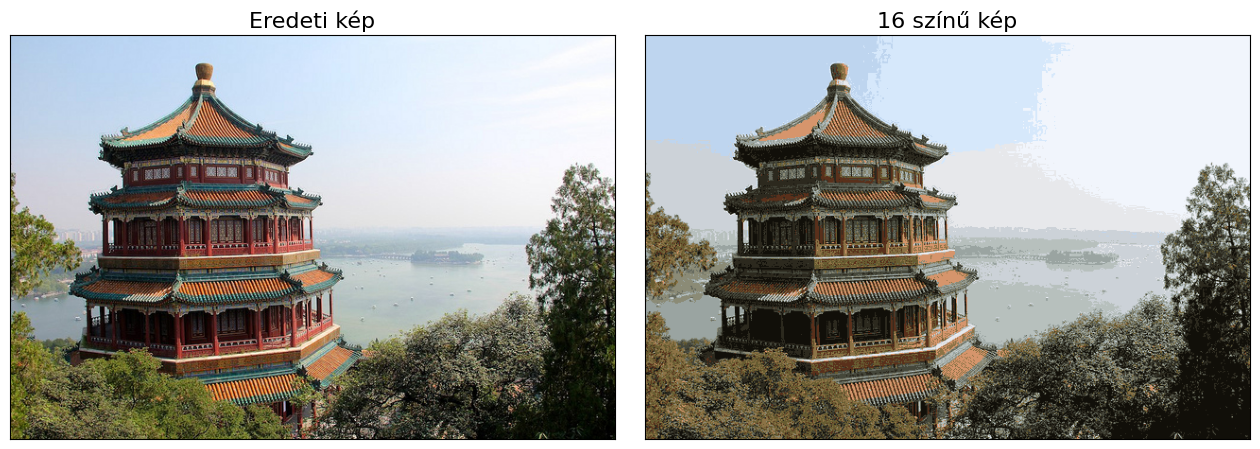

In [ ]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Eredeti kép', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16 színű kép', size=16);

#Feladat

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()

X = cancer_data.data
Y = cancer_data.target # malignant (rossz indulatú), benign (jóindulatú)


#Könyök módszerrel határozzuk meg a klaszterek számát

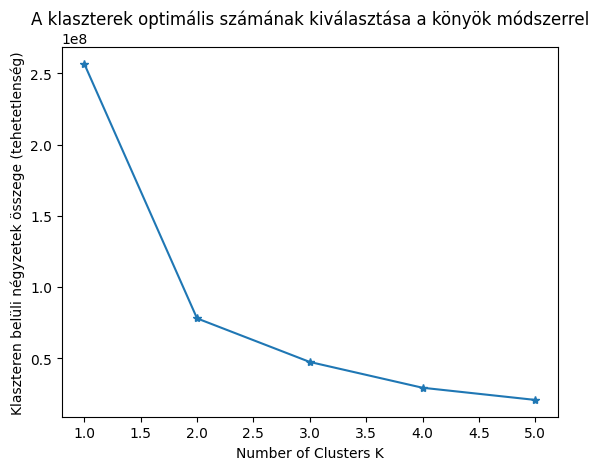

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss_list = []

# Ciklus különböző k értékekkel
for i in range(1, 6):
    # kmeans modell létrehozása, illesztése
    kmeans = KMeans(n_clusters = i, random_state = 123, n_init='auto')
    kmeans.fit(X)
    # WCSS érték hozzáadása a listához
    wcss_list.append(kmeans.inertia_)

# WCSS grafikon kirajzolása
plt.plot(range(1, 6), wcss_list, marker='*')
plt.title('A klaszterek optimális számának kiválasztása a könyök módszerrel')
plt.xlabel('Number of Clusters K')
plt.ylabel('Klaszteren belüli négyzetek összege (tehetetlenség)')
plt.show()

#Sziluette módszerrel határozzuk meg a klaszterek számát

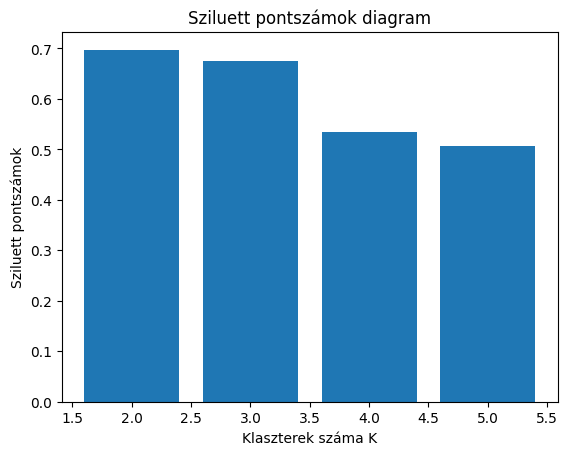

In [ ]:
from sklearn.metrics import silhouette_score
score_list = []

# Ciklus különböző k értékekkel
for i in range(2, 6):
    # kmeans modell létrehozása, illesztése
    kmeans = KMeans(n_clusters = i, random_state = 123, n_init='auto')
    kmeans.fit(X)

    # predikció kiszámítása
    pred=kmeans.predict(X)
    # sziluett pontszám kiszámítása
    score = silhouette_score(X, pred, metric='euclidean')

    # sziluett pontszám listához adása
    score_list.append(score)

# Sziluett grafikon kirajzolása
plt.bar(range(2, 6), score_list)
plt.title('Sziluett pontszámok diagram')
plt.xlabel('Klaszterek száma K')
plt.ylabel('Sziluett pontszámok')
plt.show()

# Számítsuk ki a klaszterezés pontosságát az y ismeretében

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

num_clusters = 2 # klaszter szám

# Create and fit the KMeans model
km = KMeans(n_clusters=num_clusters, n_init='auto')
km.fit(X)

predictions = km.predict(X) # cimkék prediktálása

print(accuracy_score(predictions, Y))

0.14586994727592267


In [ ]:
where_0 = np.where(predictions == 0) # megcseréljük a 0-kat és 1-ket
where_1 = np.where(predictions == 1)
predictions[where_0] = 1
predictions[where_1] = 0

In [ ]:
print(accuracy_score(predictions, Y))

0.8541300527240774


#Példa magyar nyelvű szövegek osztályozása

#Téma modellezés (haladó anyag)

2003-ban David Biel, Andrew Ng és Michael Jordan publikálták cikküket a Latent Dirichlet Allocation ( LDA ) néven ismert témamodellező algoritmusról. Az LDA egy generatív valószínűségi modell. Ez azt jelenti, hogy feltételezzük, hogy ismert a valószínűségekben megfogalmazott folyamat, amellyel az adat keletkezett, majd az adatoktól visszafelé haladunk az azokat generáló paraméterek felé. Ebben az esetben azok a témák érdekelnek, amelyek az adatokat generálták. Az itt tárgyalt folyamat az LDA legalapvetőbb formája, de a tanulás számára ez a legérthetőbb is.

##Mi a téma-modellezés?
A gépi tanulásban és a természetes nyelvi feldolgozásban a témamodell egyfajta statisztikai modell a dokumentumok gyűjteményében előforduló absztrakt "témák" felfedezésére. A téma-modellezés egy gyakran használt szövegbányászati eszköz a szövegtestben lévő rejtett szemantikai struktúrák felfedezésére. Intuitív módon, mivel egy dokumentum egy adott témáról szól, elvárható, hogy bizonyos szavak gyakrabban vagy ritkábban jelenjenek meg a dokumentumban: A "kutya" és a "csont" gyakrabban fog megjelenni a kutyákról szóló dokumentumokban, a "macska" és a "nyávog" a macskákról szóló dokumentumokban, a "a" és az "is" pedig mindkettőben egyformán. Egy dokumentum jellemzően több témát érint különböző arányban; így egy olyan dokumentumban, amely 10%-ban a macskákról és 90%-ban a kutyákról szól, valószínűleg körülbelül 9-szer több kutya szó lesz, mint macska szó.

A témamodellezési technikák által előállított "témák" hasonló szavak klaszterei. A témamodell ezt az intuíciót egy matematikai keretbe foglalja, amely lehetővé teszi egy dokumentumhalmaz vizsgálatát, és az egyes dokumentumokban található szavak statisztikája alapján annak felfedezését, hogy melyek lehetnek a témák, és hogy az egyes dokumentumok között milyen a témák egyensúlya. Ez különböző (többnyire nemlineáris) dimenziócsökkentési technikákat és felügyelet nélküli tanulási módszereket foglal magában, mint például az LDA, SVD, autoencoderek stb.

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/karsarobert/MachineLearning2025/main/index_articles.csv', header=0)

X = df.Body
y = df.category

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

#vec = CountVectorizer(analyzer='word', ngram_range=(1,3)) # analyzer='char', ngram_range=(1,5) próbáljuk ki a karakterszintű tokenizálással is
vec = CountVectorizer(analyzer='char', ngram_range=(1,5))
x_train = vec.fit_transform(X)
#x_test = vec.transform(X_test)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(ngram_range=(1,2))

x_train_tfidf = vec.fit_transform(X)
#x_test_tfidf = vec.transform(X_test)

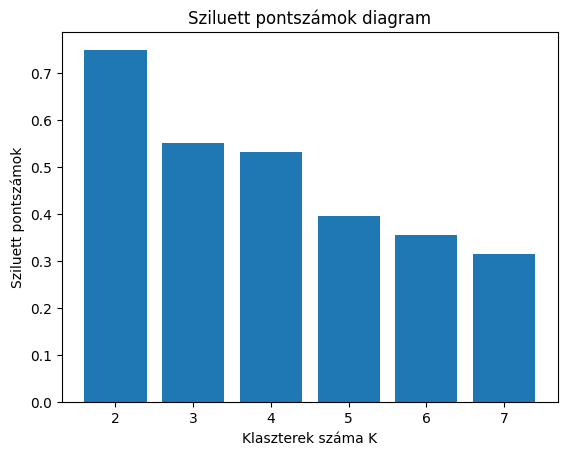

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
score_list = []

# Ciklus különböző k értékekkel
for i in range(2, 8):
    # kmeans modell létrehozása, illesztése
    kmeans = KMeans(n_clusters = i, random_state = 123, n_init='auto')
    kmeans.fit(x_train)

    # predikció kiszámítása
    pred=kmeans.predict(x_train)
    # sziluett pontszám kiszámítása
    score = silhouette_score(x_train, pred, metric='euclidean')

    # sziluett pontszám listához adása
    score_list.append(score)

# Sziluett grafikon kirajzolása
plt.bar(range(2, 8), score_list)
plt.title('Sziluett pontszámok diagram')
plt.xlabel('Klaszterek száma K')
plt.ylabel('Sziluett pontszámok')
plt.show()

In [ ]:
y.unique()

array(['belfold', 'gazdasag', 'tech', 'kultur'], dtype=object)

In [ ]:
import matplotlib.pyplot as plt

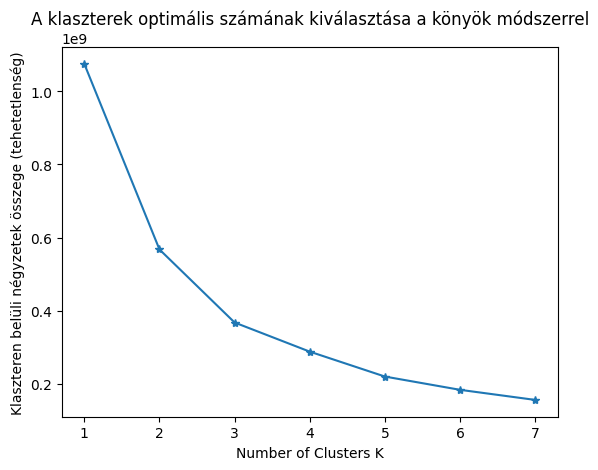

In [ ]:
from sklearn.cluster import KMeans

wcss_list = []

# Ciklus különböző k értékekkel
for i in range(1, 8):
    # kmeans modell létrehozása, illesztése
    kmeans = KMeans(n_clusters = i, random_state = 123, n_init='auto')
    kmeans.fit(x_train)
    # WCSS érték hozzáadása a listához
    wcss_list.append(kmeans.inertia_)

# WCSS grafikon kirajzolása
plt.plot(range(1, 8), wcss_list, marker='*')
plt.title('A klaszterek optimális számának kiválasztása a könyök módszerrel')
plt.xlabel('Number of Clusters K')
plt.ylabel('Klaszteren belüli négyzetek összege (tehetetlenség)')
plt.show()

#Téma modellezés

In [ ]:
!pip install nltk

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

my_stop_words = stopwords.words('hungarian')
my_stop_words.append('is')
vectorizer = CountVectorizer(min_df=5, max_df=0.9, lowercase=True, stop_words = my_stop_words, token_pattern=r'\w+') #  min_df=5, max_df=0.9,,stop_words=my_stop_words
data_vectorized = vectorizer.fit_transform(X_train)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=5, max_iter=10, learning_method='online',verbose=True)
data_lda = lda.fit_transform(data_vectorized)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


In [ ]:
def selected_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Téma %d:" % (idx))
        print([(vectorizer.get_feature_names_out()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])

In [ ]:
print("LDA Model:")
selected_topics(lda, vectorizer)

LDA Model:
Téma 0:
[('miatt', np.float64(678.5684944175837)), ('férfi', np.float64(485.4008156419237)), ('két', np.float64(444.1398979643957)), ('rendőrség', np.float64(439.4329787741465)), ('megyei', np.float64(424.85314736517245)), ('éves', np.float64(393.2770395285647)), ('közölte', np.float64(334.82065550130125)), ('hu', np.float64(313.10129994845596)), ('fotó', np.float64(286.38901902133654)), ('rendőrök', np.float64(251.40549650279604))]
Téma 1:
[('millió', np.float64(1144.2322035849702)), ('cég', np.float64(852.6645988131727)), ('ezer', np.float64(778.3845284300747)), ('2', np.float64(770.7308469915367)), ('1', np.float64(762.5930310779142)), ('5', np.float64(714.6691270314451)), ('milliárd', np.float64(666.5290219050039)), ('3', np.float64(593.5389992348071)), ('első', np.float64(575.5716833582234)), ('ha', np.float64(555.0207715607298))]
Téma 2:
[('magyar', np.float64(1005.942624035275)), ('ha', np.float64(733.8750010670441)), ('fotó', np.float64(656.812030033089)), ('mondta',

In [ ]:
!pip install pyldavis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 43.1 MB/s eta 0:00:00


In [ ]:
import pyLDAvis.lda_model

pyLDAvis.enable_notebook()
dash = pyLDAvis.lda_model.prepare(lda, data_vectorized, vectorizer, mds='tsne')
dash

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
1      81.047615 -14.993648       1        1  30.092640
2      11.813387  51.508522       2        1  26.641221
4     -72.592400  13.776623       3        1  24.047703
0     -81.131653 -81.732414       4        1  15.791955
3      12.052904 -76.955765       5        1   3.426481, topic_info=            Term         Freq        Total Category  logprob  loglift
9483      millió  1248.000000  1248.000000  Default  30.0000  30.0000
1091        bank   464.000000   464.000000  Default  29.0000  29.0000
4283      forint  1087.000000  1087.000000  Default  28.0000  28.0000
15081        zrt   470.000000   470.000000  Default  27.0000  27.0000
7373     kormány  1247.000000  1247.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
9474    milliárd    64.038622  1181.444614   Topic5  -5.4936   0.4586
6219    jegybank    46.146630   179.562873   Topic5  -5.8212   2.0149
4294    forintos    49.040502   351.032677   Topic5  -5.7604   1.4054
1651   budapesti    48.645023   443.136685   Topic5  -5.7685   1.1643
4296    forintot    47.082814   445.893587   Topic5  -5.8011   1.1255

[367 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
0          1  0.349994         0
0          3  0.648214         0
2          1  0.436273       000
2          3  0.031538       000
2          5  0.530886       000
...      ...       ...       ...
16239      1  0.124024      őket
16239      2  0.383883      őket
16239      3  0.026577      őket
16239      4  0.460660      őket
16242      4  0.994186  őrizetbe

[729 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 5, 1, 4])

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
my_stop_words

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

['a',
 'ahogy',
 'ahol',
 'aki',
 'akik',
 'akkor',
 'alatt',
 'által',
 'általában',
 'amely',
 'amelyek',
 'amelyekben',
 'amelyeket',
 'amelyet',
 'amelynek',
 'ami',
 'amit',
 'amolyan',
 'amíg',
 'amikor',
 'át',
 'abban',
 'ahhoz',
 'annak',
 'arra',
 'arról',
 'az',
 'azok',
 'azon',
 'azt',
 'azzal',
 'azért',
 'aztán',
 'azután',
 'azonban',
 'bár',
 'be',
 'belül',
 'benne',
 'cikk',
 'cikkek',
 'cikkeket',
 'csak',
 'de',
 'e',
 'eddig',
 'egész',
 'egy',
 'egyes',
 'egyetlen',
 'egyéb',
 'egyik',
 'egyre',
 'ekkor',
 'el',
 'elég',
 'ellen',
 'elõ',
 'elõször',
 'elõtt',
 'elsõ',
 'én',
 'éppen',
 'ebben',
 'ehhez',
 'emilyen',
 'ennek',
 'erre',
 'ez',
 'ezt',
 'ezek',
 'ezen',
 'ezzel',
 'ezért',
 'és',
 'fel',
 'felé',
 'hanem',
 'hiszen',
 'hogy',
 'hogyan',
 'igen',
 'így',
 'illetve',
 'ill.',
 'ill',
 'ilyen',
 'ilyenkor',
 'ison',
 'ismét',
 'itt',
 'jó',
 'jól',
 'jobban',
 'kell',
 'kellett',
 'keresztül',
 'keressünk',
 'ki',
 'kívül',
 'között',
 'közül',
 'lega

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
